# Exploratory Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Import dataset
dataset = pd.read_csv('Dataset.csv')

### Check values in each categorical variable

In [3]:
# 1. True categorical columns
categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Numeric-coded categorical / binary columns
numeric_categorical_cols = ['Had_alcohol_in_the_past', 'Has_Disability', 
                            'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid', 
                            'Had_Liver_COndition', 'Had_Cancer', 'functional_difficulty_composite',
                            'Takes_vitamin_supplements', 'Covered_by_health_insurance', 
                            'Tested_for_HIV_Virus', 'Had_high_blood_pressure']

# Combine them
all_categorical_cols = categorical_cols + numeric_categorical_cols

# 3. Loop through all categorical-like columns
for col in all_categorical_cols:
    print(f"Column: {col}")
    counts = dataset[col].value_counts(dropna=False)
    print(counts)
    print("-"*50)


Column: Had_alcohol_in_the_past
NaN    6452
1.0    4918
2.0     558
9.0       5
Name: Had_alcohol_in_the_past, dtype: int64
--------------------------------------------------
Column: Has_Disability
2.0    6599
NaN    3790
1.0    1544
Name: Has_Disability, dtype: int64
--------------------------------------------------
Column: Had_Arthritis
2.0    5258
NaN    4126
1.0    2532
9.0      17
Name: Had_Arthritis, dtype: int64
--------------------------------------------------
Column: Had_heart_attack
2.0    7462
NaN    4126
1.0     332
9.0      13
Name: Had_heart_attack, dtype: int64
--------------------------------------------------
Column: Had_Thyroid
2.0    6734
NaN    4127
1.0    1053
9.0      18
7.0       1
Name: Had_Thyroid, dtype: int64
--------------------------------------------------
Column: Had_Liver_COndition
2.0    7369
NaN    4126
1.0     425
9.0      11
7.0       2
Name: Had_Liver_COndition, dtype: int64
--------------------------------------------------
Column: Had_Cancer
2.0

### Check the columns in the dataset

In [4]:
dataset.columns

Index(['Had_alcohol_in_the_past', 'General_hearing_condition',
       'Had_high_blood_pressure', 'WBC', 'Haemoglobin', 'Platelete', 'Gender',
       'Age', 'Race_Ethnicity', 'Country_of_Birth', 'Education_Level',
       'Marital_Status', 'Household_Size', 'Income_to_Poverty_Ratio',
       'Stay_in_the_shade', 'Has_diabetes', 'Takes_vitamin_supplements',
       'Has_Disability', 'Fasting_Glucose', 'HDL_mg', 'Has_Hepatitis',
       'Covered_by_health_insurance', 'Tested_for_HIV_Virus',
       'General_health_condition', 'Received_Hepatitis_A_Vaccine',
       'Family_poverty_level_index', 'Has_Kidney_Failure', 'Had_Asthma',
       'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid',
       'Had_Liver_COndition', 'Had_Cancer', 'Teeth_and_gum_health',
       'Number_of_Moderate_Physical_activities_per_week',
       'Number_of_Vigorous_Physical_activities_per_week',
       'Advised_to_take_aspirin', 'Number_of_hours_of_sleep',
       'Cholestrol_level', 'SystolicBP', 'DiastolicBP', 'Pulse',
 

In [5]:
print("Shape of dataset:", dataset.shape)

Shape of dataset: (11933, 49)


### Remove duplicates

In [6]:
num_duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

dataset = dataset.drop_duplicates().reset_index(drop=True)
print("New dataset shape after removing duplicates:", dataset.shape)


Number of duplicate rows: 6
New dataset shape after removing duplicates: (11927, 49)


### Check Data Types

In [7]:
print("\nData types:")
print(dataset.dtypes)


Data types:
Had_alcohol_in_the_past                            float64
General_hearing_condition                          float64
Had_high_blood_pressure                            float64
WBC                                                float64
Haemoglobin                                        float64
Platelete                                          float64
Gender                                             float64
Age                                                float64
Race_Ethnicity                                     float64
Country_of_Birth                                   float64
Education_Level                                    float64
Marital_Status                                     float64
Household_Size                                     float64
Income_to_Poverty_Ratio                            float64
Stay_in_the_shade                                  float64
Has_diabetes                                       float64
Takes_vitamin_supplements                  

### Missing Values per column

In [8]:
print("\nMissing values per column:")
print(dataset.isnull().sum())


Missing values per column:
Had_alcohol_in_the_past                            6446
General_hearing_condition                           192
Had_high_blood_pressure                            3429
WBC                                                4334
Haemoglobin                                        4334
Platelete                                          4334
Gender                                                0
Age                                                   0
Race_Ethnicity                                        0
Country_of_Birth                                     19
Education_Level                                    4133
Marital_Status                                     4135
Household_Size                                        0
Income_to_Poverty_Ratio                            2039
Stay_in_the_shade                                  7625
Has_diabetes                                        192
Takes_vitamin_supplements                          3291
Has_Disability      

### % of missing values

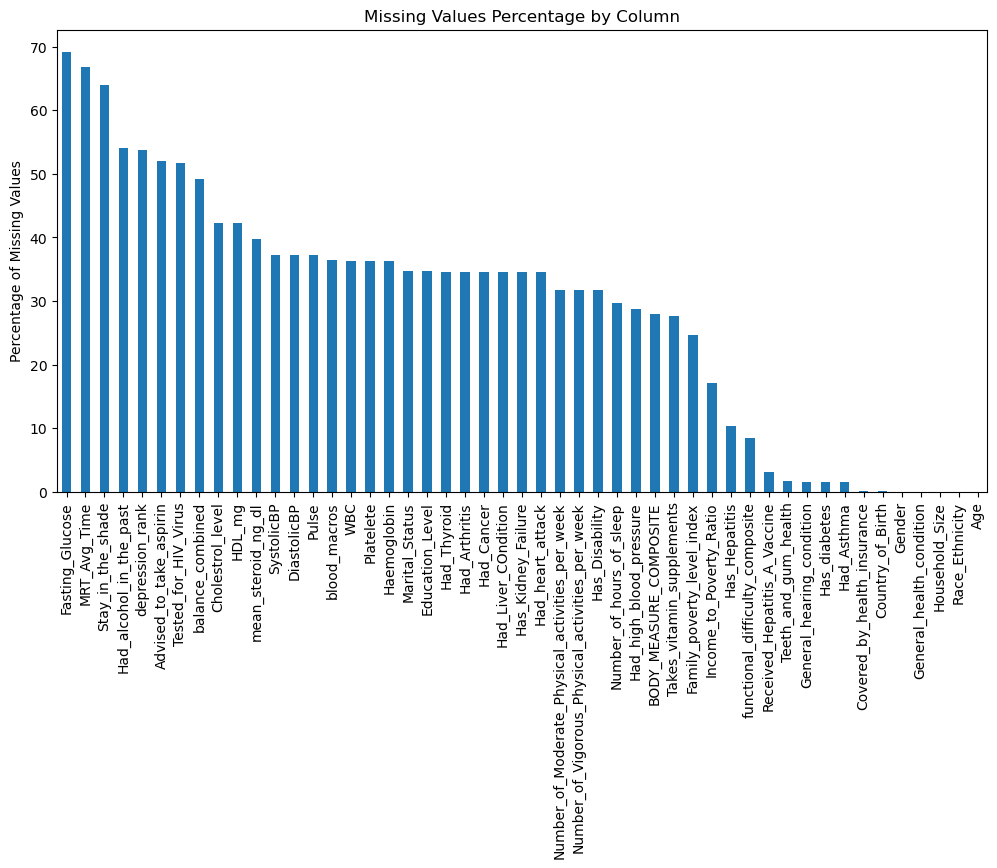

In [9]:
missing_percent = dataset.isnull().mean() * 100
missing_percent.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values Percentage by Column")
plt.show()

### Distribution 

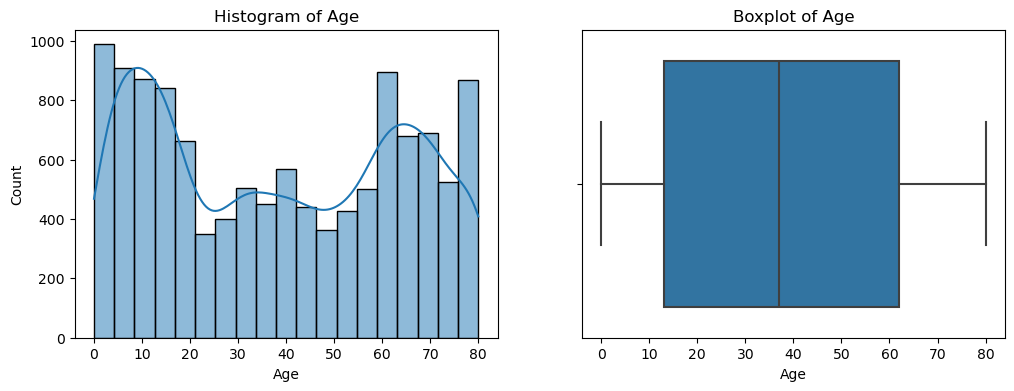

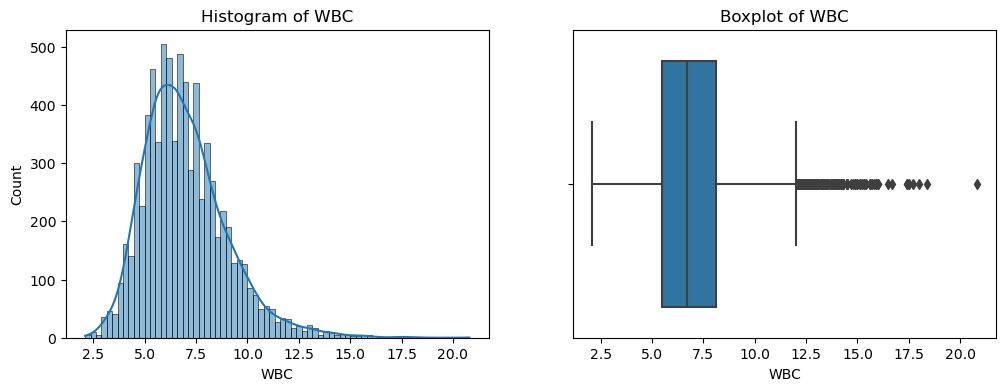

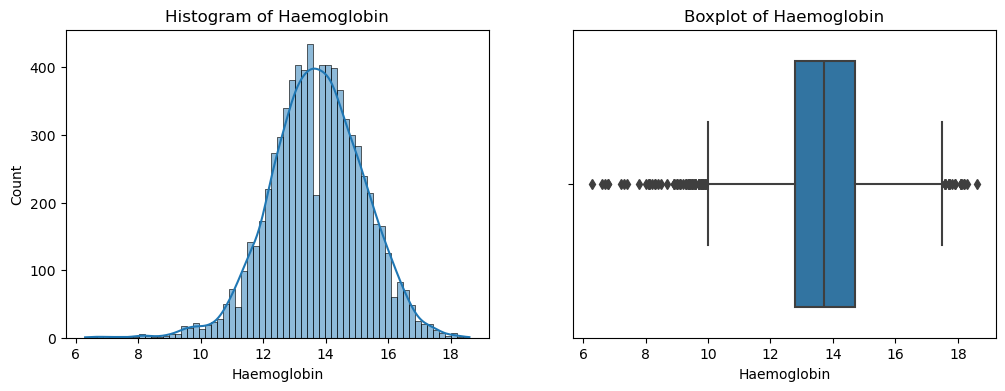

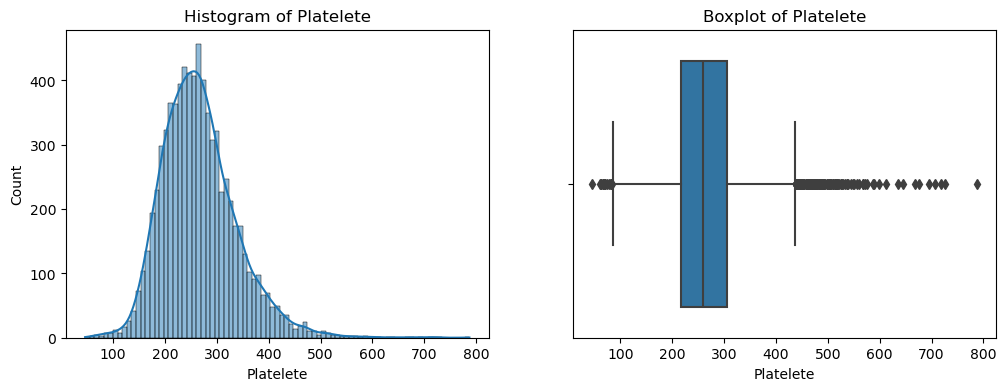

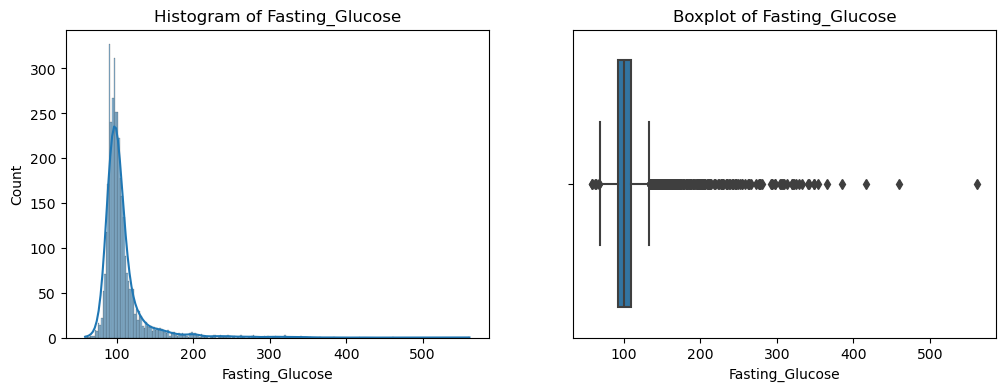

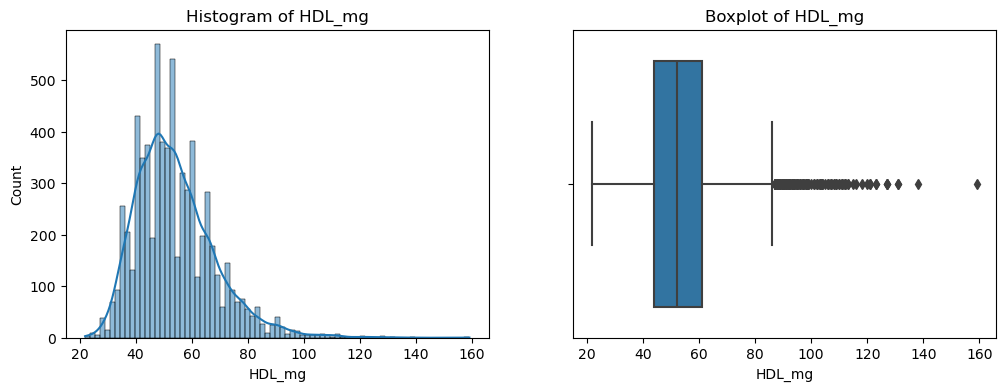

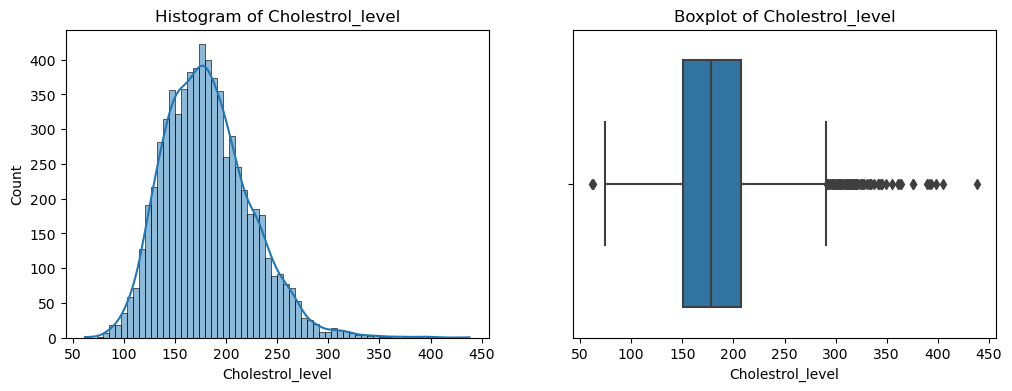

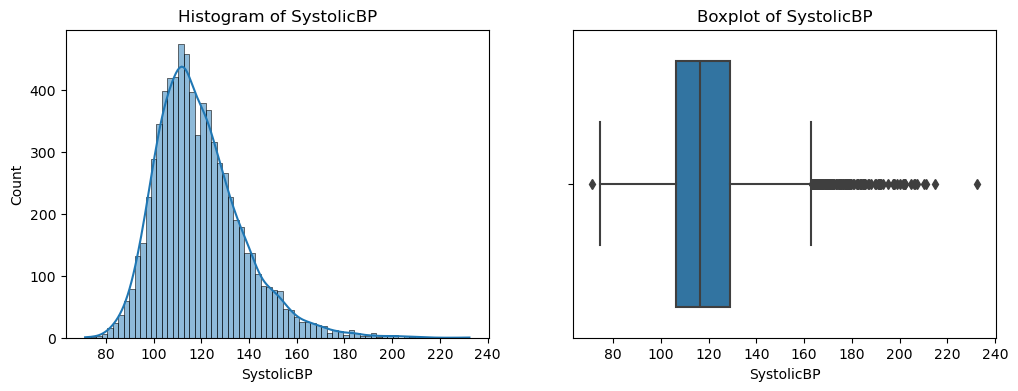

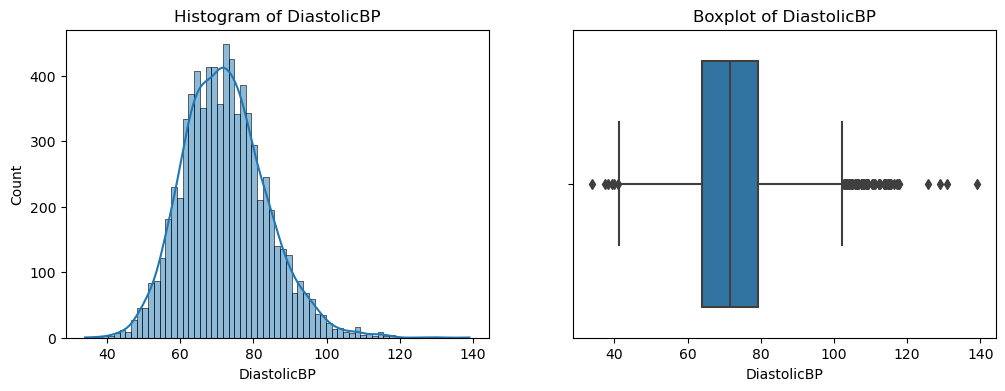

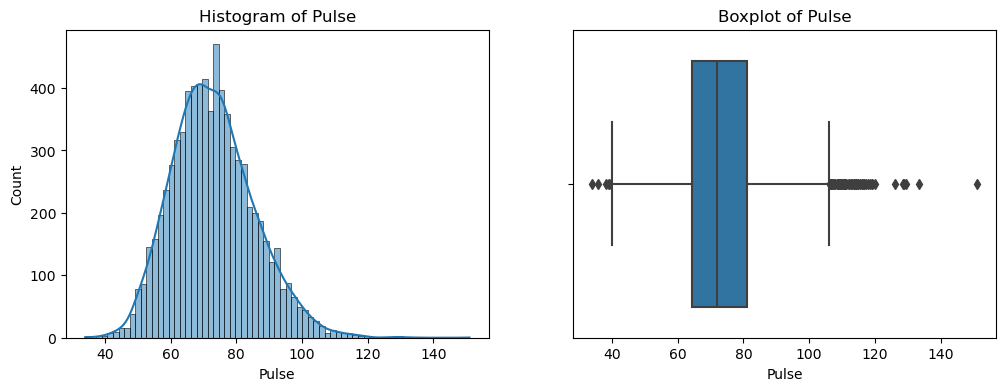

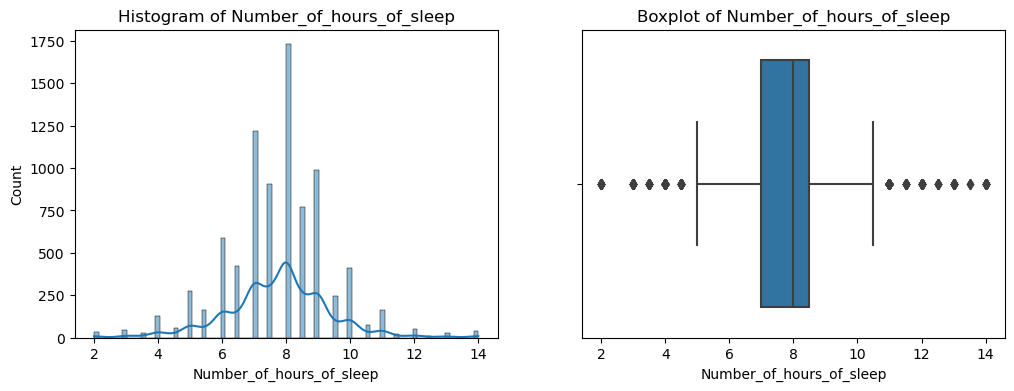

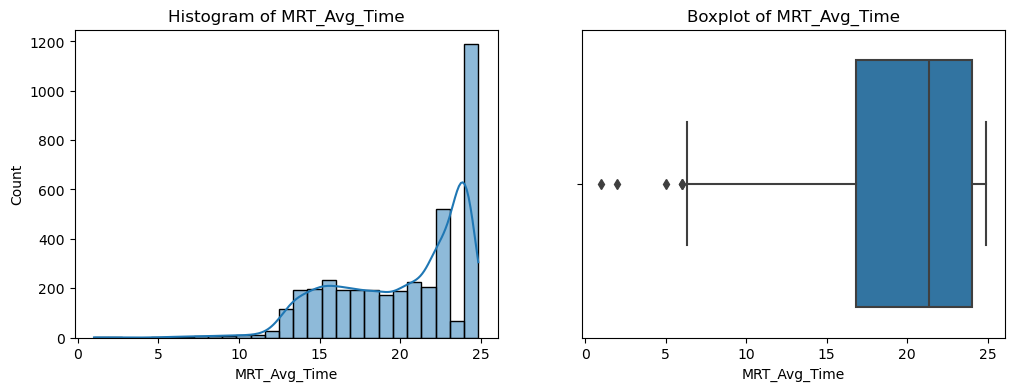

In [10]:
num_cols = ['Age','WBC','Haemoglobin','Platelete','Fasting_Glucose','HDL_mg',
            'Cholestrol_level','SystolicBP','DiastolicBP','Pulse','Number_of_hours_of_sleep','MRT_Avg_Time']

for col in num_cols:
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()

### Handling Null Values

In [11]:
# Drop rows with >50% missing values
threshold = dataset.shape[1] * 0.5
dataset = dataset.dropna(thresh=threshold).reset_index(drop=True)
print("Shape after dropping sparse rows:", dataset.shape)


Shape after dropping sparse rows: (9253, 49)


In [12]:
# --------------------------
# 1. Age binning
# --------------------------
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18','19-30','31-45','46-60','61-75','76+']
dataset['Age_Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

In [13]:
# --------------------------
# 2. Drop high-missing columns (>50-60% missing)
# --------------------------
tricky_cols = [
    'Fasting_Glucose',
    'Advised_to_take_aspirin',
    'MRT_Avg_Time',
    'balance_combined',
    'depression_rank', 
    'Stay_in_the_shade'
]
dataset = dataset.drop(columns=tricky_cols)

In [14]:
# --------------------------
# 3. Handle 0–18 special case
# --------------------------
age_0_18 = dataset['Age_Group'] == '0-18'

# Categorical → "N/A"
na_cols = ['Education_Level', 'Marital_Status']
dataset.loc[age_0_18, na_cols] = "N/A"

# Binary/medical → -1
binary_na_cols = [
    'Had_alcohol_in_the_past', 'Has_Disability', 'Has_Kidney_Failure', 
    'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid', 
    'Had_Liver_COndition', 'Had_Cancer',
    'Number_of_Moderate_Physical_activities_per_week',
    'Number_of_Vigorous_Physical_activities_per_week',
    'Tested_for_HIV_Virus', 'Had_high_blood_pressure'
]
dataset.loc[age_0_18, binary_na_cols] = -1

In [15]:
# --------------------------
# 4. Binary/groupwise mode (adults only)
# --------------------------
binary_cols = [
    'Had_alcohol_in_the_past', 
    'Had_high_blood_pressure', 
    'Takes_vitamin_supplements', 
    'Has_Disability', 
    'Covered_by_health_insurance', 
    'Tested_for_HIV_Virus',
    'functional_difficulty_composite'
]

for col in binary_cols:
    dataset.loc[~age_0_18, col] = (
        dataset.loc[~age_0_18]
        .groupby('Age_Group')[col]
        .transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x)
        )
    )


In [16]:
# --------------------------
# 5. Numeric/groupwise median
# --------------------------
numeric_cols = [
    'WBC', 'Haemoglobin', 'Platelete', 
    'Income_to_Poverty_Ratio', 'HDL_mg', 
    'SystolicBP', 'DiastolicBP', 'Pulse', 
    'BODY_MEASURE_COMPOSITE', 'blood_macros', 'mean_steroid_ng_dl', 
    'Number_of_hours_of_sleep', 'Cholestrol_level', 
    'Number_of_Moderate_Physical_activities_per_week', 
    'Number_of_Vigorous_Physical_activities_per_week', 
    'Family_poverty_level_index'
]

for col in numeric_cols:
    dataset[col] = dataset.groupby('Age_Group')[col].transform(lambda x: x.fillna(x.median()))

In [17]:
# --------------------------
# 6. Other categorical imputation
# --------------------------
categorical_cols = [
    'Education_Level', 'Marital_Status',
    'Has_Kidney_Failure', 'Had_Arthritis',
    'Had_heart_attack', 'Had_Thyroid',
    'Had_Liver_COndition', 'Had_Cancer'
]

for col in categorical_cols:
    if col in ['Education_Level', 'Marital_Status']:
        # Adults only → mode; kids keep "N/A"
        dataset.loc[~age_0_18, col] = (
            dataset.loc[~age_0_18]
            .groupby('Age_Group')[col]
            .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
        )
    else:
        # All age groups → mode
        dataset[col] = dataset.groupby('Age_Group')[col].transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
        )



In [18]:
# --------------------------
# 7. Country_of_Birth → Unknown
# --------------------------
dataset['Country_of_Birth'] = dataset['Country_of_Birth'].fillna('Unknown')

In [19]:
# --------------------------
# 9. Final missingness check
# --------------------------
missing_pct_by_group = (
    dataset.groupby("Age_Group")
    .apply(lambda g: g.isnull().mean() * 100)
    .T
).round(1)

print("Missing % by Age Group:")
missing_pct_by_group

Missing % by Age Group:


Age_Group,0-18,19-30,31-45,46-60,61-75,76+
Had_alcohol_in_the_past,0.0,0.0,0.0,0.0,0.0,0.0
General_hearing_condition,0.0,0.0,0.0,0.0,0.0,0.0
Had_high_blood_pressure,0.0,0.0,0.0,0.0,0.0,0.0
WBC,0.0,0.0,0.0,0.0,0.0,0.0
Haemoglobin,0.0,0.0,0.0,0.0,0.0,0.0
Platelete,0.0,0.0,0.0,0.0,0.0,0.0
Gender,0.0,0.0,0.0,0.0,0.0,0.0
Age,0.0,0.0,0.0,0.0,0.0,0.0
Race_Ethnicity,0.0,0.0,0.0,0.0,0.0,0.0
Country_of_Birth,0.0,0.0,0.0,0.0,0.0,0.0


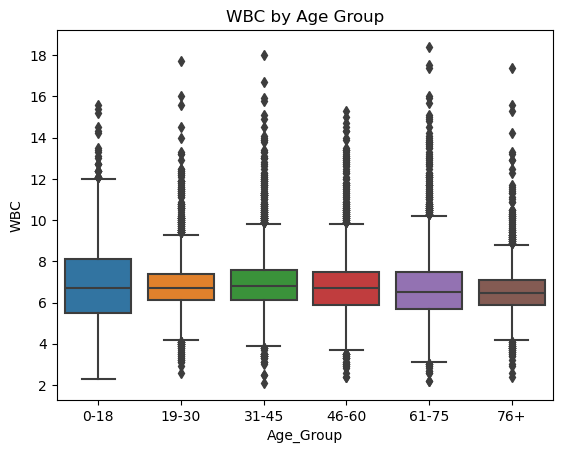

In [20]:
sns.boxplot(x='Age_Group', y='WBC', data=dataset)
plt.title('WBC by Age Group')
plt.show()


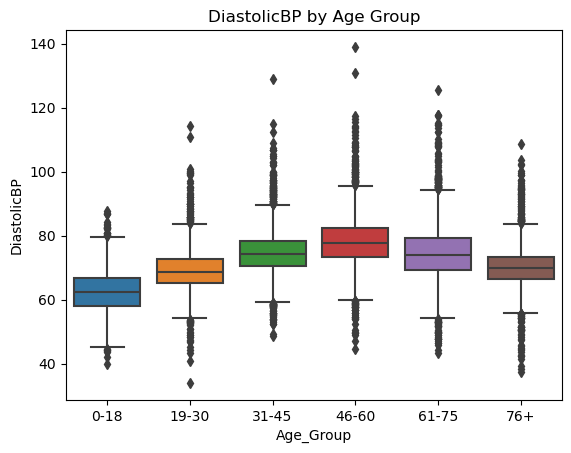

In [21]:
sns.boxplot(x='Age_Group', y='DiastolicBP', data=dataset)
plt.title('DiastolicBP by Age Group')
plt.show()


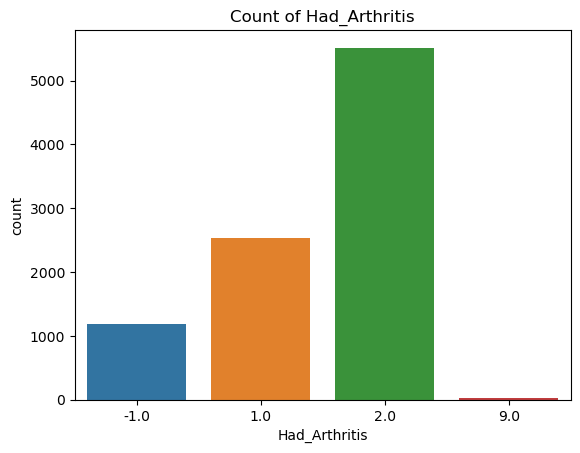

In [22]:
import seaborn as sns
sns.countplot(x='Had_Arthritis', data=dataset)
plt.title('Count of Had_Arthritis')
plt.show()
